# Chapter 03 - Processing, Wrangling and Visualizing Data

# Handling Comma Separated Value Files

This notebook showcases methods to extract data from CSVs:
+ csv containing delimiter separated values
+ csv containing tabular data

In [6]:
# import required libraries
import csv
import pandas as pd
from pprint import pprint

## Utilities

In [7]:
def print_basic_csv(file_name, delimiter=','):
    """This function extracts and prints csv content from given filename
       Details: https://docs.python.org/2/library/csv.html
    Args:
        file_name (str): file path to be read
        delimiter (str): delimiter used in csv. Default is comma (',')

    Returns:
        None

    """
    csv_rows = list()
    csv_attr_dict = dict()
    csv_reader = None

    # read csv
    csv_reader = csv.reader(open(file_name, 'r'), delimiter=delimiter)
        
    # iterate and extract data    
    for row in csv_reader:
        print(row)
        csv_rows.append(row)
    
    # prepare attribute lists
    for col in csv_rows[0]:
        csv_attr_dict[col]=list()
    
    # iterate and add data to attribute lists
    for row in csv_rows[1:]:
        csv_attr_dict['sno'].append(row[0])
        csv_attr_dict['fruit'].append(row[1])
        csv_attr_dict['color'].append(row[2])
        csv_attr_dict['price'].append(row[3])
    
    # print the result
    print("\n\n")
    print("CSV Attributes::")
    pprint(csv_attr_dict)
            


def print_tabular_data(file_name,delimiter=","):
    """This function extracts and prints tabular csv content from given filename
       Details: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
    Args:
        file_name (str): file path to be read
        delimiter (str): delimiter used in csv. Default is comma ('\t')

    Returns:
        None

    """
    df = pd.read_csv(file_name,sep=delimiter)
    print(df)

## Parse using CSV module

The print_basic_csv() function takes the input file name along with delimiter as input parameters.

In [9]:
print_basic_csv(r'tabular_csv.csv')

['sno', 'fruit', 'color', 'price']
['1', 'apple', 'red', '110.85']
['2', 'banana', 'yellow', '50.12']
['3', 'mango', 'yellow', '70.29']
['4', 'orange', 'orange', '80.00']
['5', 'kiwi', 'green', '150.00']
['6', 'pineapple', 'yellow', '90.00']
['7', 'guava', 'green', '20.00']



CSV Attributes::
{'color': ['red', 'yellow', 'yellow', 'orange', 'green', 'yellow', 'green'],
 'fruit': ['apple', 'banana', 'mango', 'orange', 'kiwi', 'pineapple', 'guava'],
 'price': ['110.85', '50.12', '70.29', '80.00', '150.00', '90.00', '20.00'],
 'sno': ['1', '2', '3', '4', '5', '6', '7']}


The first output in the above cell shows the data in the csv as-is.
The second one is the parsed output showcasing the contents of the csv as key-value pairs


--------

## Parse using pandas

The print_tabular_data() function takes the input file name along with delimiter as input parameters. It uses pandas to do the heavy lifting

In [11]:
print_tabular_data(r'tabular_csv.csv')

   sno      fruit   color   price
0    1      apple     red  110.85
1    2     banana  yellow   50.12
2    3      mango  yellow   70.29
3    4     orange  orange   80.00
4    5       kiwi   green  150.00
5    6  pineapple  yellow   90.00
6    7      guava   green   20.00


The output in the above cell shows how pandas reads a csv and prepares a tabular dataframe

# Data Wrangling

In [12]:
# import required libraries
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange
from sklearn import preprocessing

pd.options.mode.chained_assignment = None

In [13]:

def _random_date(start,date_count):
    """This function generates a random date based on params
    Args:
        start (date object): the base date
        date_count (int): number of dates to be generated
    Returns:
        list of random dates

    """
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days=randrange(42))
        yield curr
        date_count-=1


def generate_sample_data(row_count=100):
    """This function generates a random transaction dataset
    Args:
        row_count (int): number of rows for the dataframe
    Returns:
        a pandas dataframe

    """
    
    # sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    user_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000
    
    
    # base list of attributes
    data_dict = {
    'Serial No': np.arange(row_count)+serial_number_sentinel,
    'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y") 
                                                    for x in _random_date(startDate,
                                                                          row_count)]).date
                                  ),
    'User ID': np.random.permutation(np.random.randint(0,
                                                       row_count,
                                                       size=int(row_count/10)) + user_id_sentinel).tolist()*10,
    'Product ID': np.random.permutation(np.random.randint(0,
                                                          row_count,
                                                          size=int(row_count/10))+ product_id_sentinel).tolist()*10 ,
    'Quantity Purchased': np.random.permutation(np.random.randint(1,
                                                                  42,
                                                                  size=row_count)),
    'Price': np.round(np.abs(np.random.randn(row_count)+1)*price_sentinel,
                      decimals=2),
    'User Type':np.random.permutation([chr(random.randrange(97, 97 + 3 + 1)) 
                                            for i in range(row_count)])
    }
    
    # introduce missing values
    for index in range(int(np.sqrt(row_count))): 
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101
        
    
    # create data frame
    df = pd.DataFrame(data_dict)
    
    return df
    

def describe_dataframe(df=pd.DataFrame()):
    """This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Returns:
        None

    """
    print("\n\n")
    print("*"*30)
    print("About the Data")
    print("*"*30)
    
    print("Number of rows::",df.shape[0])
    print("Number of columns::",df.shape[1])
    print("\n")
    
    print("Column Names::",df.columns.values.tolist())
    print("\n")
    
    print("Column Data Types::\n",df.dtypes)
    print("\n")
    
    print("Columns with Missing Values::",df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values::",len(pd.isnull(df).any(1).nonzero()[0].tolist()))
    print("\n")
    
    print("Sample Indices with missing data::",pd.isnull(df).any(1).nonzero()[0].tolist()[0:5])
    print("\n")
    
    print("General Stats::")
    print(df.info())
    print("\n")
    
    print("Summary Stats::")
    print(df.describe())
    print("\n")
    
    print("Dataframe Sample Rows::")
    display(df.head(5))
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

# Generate a Sample Dataset

In [14]:
df = generate_sample_data(row_count=1000)

In [15]:
#describe the dataset
describe_dataframe(df)




******************************
About the Data
******************************
Number of rows:: 1000
Number of columns:: 7


Column Names:: ['Serial No', 'Date', 'User ID', 'Product ID', 'Quantity Purchased', 'Price', 'User Type']


Column Data Types::
 Serial No               int32
Date                   object
User ID                 int64
Product ID              int64
Quantity Purchased      int32
Price                 float64
User Type              object
dtype: object


Columns with Missing Values:: ['Date', 'Price']


Number of rows with Missing Values:: 61


Sample Indices with missing data:: [0, 1, 2, 4, 6]


General Stats::


C:\Users\Shashi Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
C:\Users\Shashi Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Serial No             1000 non-null int32
Date                  970 non-null object
User ID               1000 non-null int64
Product ID            1000 non-null int64
Quantity Purchased    1000 non-null int32
Price                 969 non-null float64
User Type             1000 non-null object
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 47.0+ KB
None


Summary Stats::
         Serial No      User ID  Product ID  Quantity Purchased        Price
count  1000.000000  1000.000000  1000.00000          1000.00000   969.000000
mean   1450.289000  5518.983000   544.39000            21.83000  2253.979474
std     385.237526   343.038695   292.22271            12.09667  1524.992949
min      -1.000000  -101.000000     0.00000             1.00000     5.020000
25%    1222.750000  5238.000000   267.75000            11.00000  1011.140000
50%    1479.500000  5544.000000   544.500

,Serial No,Date,User ID,Product ID,Quantity Purchased,Price,User Type
0,1000,NaN,-101,0,18,1623.49,n
1,1001,NaN,5712,694,33,1691.05,n
2,1002,NaN,5351,1095,32,488.13,n
3,1003,2016-09-01,5007,269,5,1398.15,n
4,1004,NaN,5308,162,18,3501.47,n


# Rename Columns

In [16]:
print("Dataframe columns:\n{}".format(df.columns.tolist()))

Dataframe columns:
['Serial No', 'Date', 'User ID', 'Product ID', 'Quantity Purchased', 'Price', 'User Type']


In [17]:
cleanup_column_names(df)

In [18]:
print("Dataframe columns:\n{}".format(df.columns.tolist()))

Dataframe columns:
['serial_no', 'date', 'user_id', 'product_id', 'quantity_purchased', 'price', 'user_type']


# Sort rows on defined attributes

In [19]:
display(df.sort_values(['serial_no', 'price'], 
                         ascending=[True, False]).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
404,-1,2016-09-02,5308,162,40,6029.44,a
558,-1,2016-01-25,5500,574,41,5428.27,a
961,-1,2016-07-02,5668,1037,19,5146.36,b
66,-1,2016-01-28,5078,1070,39,4892.49,a
736,-1,2016-01-22,5767,192,7,4840.33,d


# Rearrange Columns in Dataframe

In [20]:
display(df[['serial_no','date','user_id','user_type',
              'product_id','quantity_purchased','price']].head())

,serial_no,date,user_id,user_type,product_id,quantity_purchased,price
0,1000,NaN,-101,n,0,18,1623.49
1,1001,NaN,5712,n,694,33,1691.05
2,1002,NaN,5351,n,1095,32,488.13
3,1003,2016-09-01,5007,n,269,5,1398.15
4,1004,NaN,5308,n,162,18,3501.47


# Filtering Columns

#### Using Column Index

In [21]:
# print 10 values from column at index 3
print(df.iloc[:,3].values[0:10])

[   0  694 1095  269  162  264  816  566  201  213]


#### Using Column Datatype

In [22]:
# print 10 values of columns with data type float
print(df.select_dtypes(include=['float64']).values[:10,0])

[1623.49 1691.05  488.13 1398.15 3501.47 4426.06 2900.63 1491.   1506.47
 1010.83]


# Filtering Rows

In [26]:
display(df.iloc[[10,501,20]])

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
10,1010,2016-05-02,5153,289,38,3161.56,n
501,1501,2016-02-02,5712,694,13,273.62,a
20,1020,2016-05-02,5118,545,5,2519.45,n


 #### Exclude Specific Row indices

In [27]:
display(df.drop([0,24,51], axis=0).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
1,1001,NaN,5712,694,33,1691.05,n
2,1002,NaN,5351,1095,32,488.13,n
3,1003,2016-09-01,5007,269,5,1398.15,n
4,1004,NaN,5308,162,18,3501.47,n
5,1005,2016-01-20,5420,264,40,4426.06,n


#### Conditional Filtering

In [28]:
display(df[df.quantity_purchased>25].head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
1,1001,NaN,5712,694,33,1691.05,n
2,1002,NaN,5351,1095,32,488.13,n
5,1005,2016-01-20,5420,264,40,4426.06,n
6,1006,NaN,5779,816,40,2900.63,n
8,1008,NaN,5638,201,40,1506.47,n


#### Offset from top of the dataframe

In [29]:
display(df[100:].head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
100,1100,2016-11-01,5336,180,35,2763.78,c
101,1101,2016-08-02,5712,694,37,2693.63,b
102,1102,NaN,5351,1095,34,5091.96,a
103,1103,2016-01-02,5007,269,31,4958.95,c
104,1104,2016-07-02,5308,162,40,2496.74,b


In [30]:
display(df[-10:].head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
990,1990,2016-12-01,5776,334,28,NaN,c
991,1991,2016-01-17,5096,149,11,6697.05,a
992,1992,2016-01-23,5016,824,28,220.47,c
993,1993,2016-01-30,5998,447,4,2542.78,d
994,1994,2016-01-28,5629,898,35,4036.20,a


# TypeCasting/Data Type Conversion

In [31]:
df['date'] = pd.to_datetime(df.date)
# compare dtypes of the original df with this one
print(df.dtypes)

serial_no                      int32
date                  datetime64[ns]
user_id                        int64
product_id                     int64
quantity_purchased             int32
price                        float64
user_type                     object
dtype: object


# Apply/Map Usage

In [32]:

df['user_class'] = df['user_type'].map(expand_user_type)
display(df.tail())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class
995,1995,2016-06-01,5599,861,6,341.64,b,new
996,1996,2016-01-25,5950,689,36,NaN,b,new
997,1997,2016-10-01,5351,976,24,226.35,b,new
998,1998,2016-01-18,5899,1098,39,67.59,c,existing
999,1999,2016-01-26,5609,424,28,25.96,c,existing


Apply: Using apply to get attribute ranges

In [33]:
display(df.select_dtypes(include=[np.number]).apply(lambda x: 
                                                        x.max()- x.min()))

serial_no             2000.00
user_id               6099.00
product_id            1098.00
quantity_purchased      40.00
price                 8027.33
dtype: float64

Applymap: Extract week from date

In [34]:
df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week 
                                                if not pd.isnull(dt.week) 
                                                else 0)

In [35]:
display(df.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
0,1000,NaT,-101,0,18,1623.49,n,error,0
1,1001,NaT,5712,694,33,1691.05,n,error,0
2,1002,NaT,5351,1095,32,488.13,n,error,0
3,1003,2016-09-01,5007,269,5,1398.15,n,error,35
4,1004,NaT,5308,162,18,3501.47,n,error,0


# Missing Values

Drop Rows with missing dates

In [36]:
df_dropped = df.dropna(subset=['date'])
display(df_dropped.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
3,1003,2016-09-01,5007,269,5,1398.15,n,error,35
5,1005,2016-01-20,5420,264,40,4426.06,n,error,3
7,1007,2016-07-02,5073,566,9,1491.00,n,error,26
10,1010,2016-05-02,5153,289,38,3161.56,n,error,18
12,1012,2016-01-28,5262,228,17,1508.11,n,error,4


###### Fill Missing Price values with mean price

In [37]:
df_dropped['price'].fillna(value=np.round(df.price.mean(),decimals=2),
                                inplace=True)

###### Fill Missing user_type values with value from previous row (forward fill)

In [38]:
df_dropped['user_type'].fillna(method='ffill',inplace=True)

###### Fill Missing user_type values with value from next row (backward fill)

In [39]:
df_dropped['user_type'].fillna(method='bfill',inplace=True)

# Duplicates

In [40]:

# sample duplicates
display(df_dropped[df_dropped.duplicated(subset=['serial_no'])].head())
print("Shape of df={}".format(df_dropped.shape))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
192,-1,2016-09-02,5016,824,35,142.85,b,new,35
212,-1,2016-06-01,5262,228,9,1887.24,d,loyal_existing,22
244,-1,2016-03-02,5573,1088,30,2461.79,b,new,9
290,-1,2016-01-29,5776,334,31,1123.39,a,new,4
299,-1,2016-01-17,5609,424,35,3261.43,a,new,2


Shape of df=(970, 9)


In [41]:
df_dropped.drop_duplicates(subset=['serial_no'],inplace=True)

In [42]:
# updated dataframe
display(df_dropped.head())
print("Shape of df={}".format(df_dropped.shape))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
3,1003,2016-09-01,5007,269,5,1398.15,n,error,35
5,1005,2016-01-20,5420,264,40,4426.06,n,error,3
7,1007,2016-07-02,5073,566,9,1491.00,n,error,26
10,1010,2016-05-02,5153,289,38,3161.56,n,error,18
12,1012,2016-01-28,5262,228,17,1508.11,n,error,4


Shape of df=(941, 9)


Remove rows which have less than 3 attributes with non-missing data

In [43]:
display(df.dropna(thresh=3).head())
print("Shape of df={}".format(df.dropna(thresh=3).shape))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
0,1000,NaT,-101,0,18,1623.49,n,error,0
1,1001,NaT,5712,694,33,1691.05,n,error,0
2,1002,NaT,5351,1095,32,488.13,n,error,0
3,1003,2016-09-01,5007,269,5,1398.15,n,error,35
4,1004,NaT,5308,162,18,3501.47,n,error,0


Shape of df=(1000, 9)


# Encode Categoricals

One Hot Encoding Using get_dummies()

In [44]:

display(pd.get_dummies(df,columns=['user_type']).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_class,purchase_week,user_type_a,user_type_b,user_type_c,user_type_d,user_type_n
0,1000,NaT,-101,0,18,1623.49,error,0,0,0,0,0,1
1,1001,NaT,5712,694,33,1691.05,error,0,0,0,0,0,1
2,1002,NaT,5351,1095,32,488.13,error,0,0,0,0,0,1
3,1003,2016-09-01,5007,269,5,1398.15,error,35,0,0,0,0,1
4,1004,NaT,5308,162,18,3501.47,error,0,0,0,0,0,1


Label Mapping

In [45]:
type_map={'a':0,'b':1,'c':2,'d':3,np.NAN:-1}
df['encoded_user_type'] = df.user_type.map(type_map)
display((df.tail()))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
995,1995,2016-06-01,5599,861,6,341.64,b,new,22,1.0
996,1996,2016-01-25,5950,689,36,NaN,b,new,4,1.0
997,1997,2016-10-01,5351,976,24,226.35,b,new,39,1.0
998,1998,2016-01-18,5899,1098,39,67.59,c,existing,3,2.0
999,1999,2016-01-26,5609,424,28,25.96,c,existing,4,2.0


# Random Sampling data from DataFrame

In [46]:
display(df.sample(frac=0.2, replace=True, random_state=42).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
102,1102,NaT,5351,1095,34,5091.96,a,new,0,0.0
435,1435,2016-01-15,5407,680,24,814.70,c,existing,2,2.0
860,1860,2016-01-21,5730,332,27,185.19,d,loyal_existing,3,3.0
270,1270,2016-01-15,5531,777,10,943.74,d,loyal_existing,2,3.0
106,1106,2016-01-23,5779,816,11,998.44,c,existing,3,2.0


# Normalizing Numeric Values

Normalize price values using Min-Max Scaler

In [47]:
df_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_normalized['price'].values.reshape(-1,1))
df_normalized['price'] = np_scaled.reshape(-1,1)

In [48]:
display(df_normalized.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
29,1029,2016-01-31,5308,274,21,0.613604,b,new,4,1.0
30,1030,2016-02-02,5333,704,4,0.365261,d,loyal_existing,5,3.0
31,1031,2016-04-02,5128,230,34,0.372486,b,new,13,1.0
34,1034,2016-01-23,5235,212,22,0.063484,d,loyal_existing,3,3.0
36,1036,2016-01-23,5767,192,41,0.147433,d,loyal_existing,3,3.0


Normalize quantity purchased values using Robust Scaler

In [49]:

df_normalized = df.dropna().copy()
robust_scaler = preprocessing.RobustScaler()
rs_scaled = robust_scaler.fit_transform(df_normalized['quantity_purchased'].values.reshape(-1,1))
df_normalized['quantity_purchased'] = rs_scaled.reshape(-1,1)

In [50]:
display(df_normalized.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
29,1029,2016-01-31,5308,274,-0.090909,4930.62,b,new,4,1.0
30,1030,2016-02-02,5333,704,-0.863636,2937.09,d,loyal_existing,5,3.0
31,1031,2016-04-02,5128,230,0.500000,2995.09,b,new,13,1.0
34,1034,2016-01-23,5235,212,-0.045455,514.63,d,loyal_existing,3,3.0
36,1036,2016-01-23,5767,192,0.818182,1188.51,d,loyal_existing,3,3.0


# Data Summarization

Condition based aggregation

In [51]:
print("Mean price of items purchased by user_type=a :: {}".format(df['price'][df['user_type']=='a'].mean()))

Mean price of items purchased by user_type=a :: 2245.081289062502


Condtion based counts

In [52]:
print(df['purchase_week'].value_counts())

3     149
4     140
2     120
35     61
39     56
22     55
26     53
5      52
13     51
44     46
53     43
31     41
9      36
18     31
0      30
17     20
48     16
Name: purchase_week, dtype: int64


# Group By

Group By certain attributes

In [53]:
print(df.groupby(['user_class'])['quantity_purchased'].sum())

user_class
error               594
existing           5332
loyal_existing     4682
new               11222
Name: quantity_purchased, dtype: int32


Group By with different aggregate functions

In [54]:
display(df.groupby(['user_class'])['quantity_purchased'].agg([np.sum,
                                                                np.mean,
                                                                np.count_nonzero]))

,sum,mean,count_nonzero
user_class,,,
error,594,19.161290,31
existing,5332,23.082251,231
loyal_existing,4682,20.716814,226
new,11222,21.917969,512


- Group by specific aggregate functions for each attribute

In [55]:
display(df.groupby(['user_class','user_type']).agg({'price':np.mean,
                                                        'quantity_purchased':np.max}))

price  quantity_purchased
user_class     user_type                                 
error          n          2269.061333                  40
existing       c          2308.342345                  41
loyal_existing d          2174.455364                  41
new            a          2245.081289                  41
               b          2283.662068                  41

- Group by with multiple agg for each attribute

In [56]:

display(df.groupby(['user_class','user_type']).agg({'price':{
                                                                'total_price':np.sum,
                                                                'mean_price':np.mean,
                                                                'variance_price':np.std,
                                                                'count':np.count_nonzero},
                                                   'quantity_purchased':np.sum}))

C:\Users\Shashi Surya\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


price                                     \
                         total_price   mean_price variance_price  count   
user_class     user_type                                                  
error          n            68071.84  2269.061333    1282.604261   31.0   
existing       c           521685.37  2308.342345    1607.196787  231.0   
loyal_existing d           478380.18  2174.455364    1486.390462  226.0   
new            a           574740.81  2245.081289    1528.380769  265.0   
               b           541227.91  2283.662068    1513.320546  247.0   

                         quantity_purchased  
                                        sum  
user_class     user_type                     
error          n                        594  
existing       c                       5332  
loyal_existing d                       4682  
new            a                       5924  
               b                       5298

# Pivot Tables

In [58]:
display(df.pivot_table(index='date', columns='user_type', 
                         values='price',aggfunc=np.mean))

user_type,a,b,c,d,n
date,,,,,
2016-01-01,1167.043333,2178.802857,2909.806000,2524.406667,1297.020000
2016-01-02,1696.651429,653.420000,1713.341667,2427.224444,NaN
2016-01-13,2155.555000,2898.016667,2918.472000,2568.806000,4000.170000
2016-01-14,3613.532500,3180.631667,3078.593333,2390.721250,NaN
2016-01-15,1907.062857,2711.813750,1270.266000,2122.863750,NaN
2016-01-16,2014.672000,2415.720000,3257.690000,2112.666667,NaN
2016-01-17,2864.722500,1084.162000,2486.072500,1720.836667,NaN
2016-01-18,2310.068750,3667.945000,1918.634286,1296.370000,NaN
2016-01-19,2364.998571,2278.413333,1233.700000,1775.825000,NaN


- Stack a Dataframe

In [59]:
print(df.stack())

0    serial_no                            1000
     user_id                              -101
     product_id                              0
     quantity_purchased                     18
     price                             1623.49
     user_type                               n
     user_class                          error
     purchase_week                           0
1    serial_no                            1001
     user_id                              5712
     product_id                            694
     quantity_purchased                     33
     price                             1691.05
     user_type                               n
     user_class                          error
     purchase_week                           0
2    serial_no                            1002
     user_id                              5351
     product_id                           1095
     quantity_purchased                     32
     price                              488.13
     user_typ

# Data Visualization

This script showcases following data vizualizations using :

- pandas
- plots and sub plots
- histograms
- box plots
- scatter plots
- timeseries
- matplotlib

In [60]:
#matplotlib inline
# import required libraries
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)

from IPython.display import display, HTML

In [61]:
def _random_date(start,date_count):
    """This function generates a random date based on params
    Args:
        start (date object): the base date
        date_count (int): number of dates to be generated
    Returns:
        list of random dates

    """
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days=randrange(42))
        yield curr
        date_count-=1


def generate_sample_data(row_count=100):
    """This function generates a random transaction dataset
    Args:
        row_count (int): number of rows for the dataframe
    Returns:
        a pandas dataframe

    """
    
    # sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    user_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000
    
    
    # base list of attributes
    data_dict = {
    'Serial No': np.arange(row_count)+serial_number_sentinel,
    'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y") 
                                                    for x in _random_date(startDate,
                                                                          row_count)]).date
                                  ),
    'User ID': np.random.permutation(np.random.randint(0,
                                                       row_count,
                                                       size=int(row_count/10)) + user_id_sentinel).tolist()*10,
    'Product ID': np.random.permutation(np.random.randint(0,
                                                          row_count,
                                                          size=int(row_count/10)) + product_id_sentinel).tolist()*10 ,
    'Quantity Purchased': np.random.permutation(np.random.randint(1,
                                                                  42,
                                                                  size=row_count)),
    'Price': np.round(np.abs(np.random.randn(row_count)+1)*price_sentinel,
                      decimals=2),
    'User Type':np.random.permutation([chr(random.randrange(97, 97 + 3 + 1)) 
                                            for i in range(row_count)])
    }
    
    # introduce missing values
    for index in range(int(np.sqrt(row_count))): 
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101
        
    
    # create data frame
    df = pd.DataFrame(data_dict)
    
    return df
    
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

In [62]:
df = generate_sample_data(row_count=1000)
cleanup_column_names(df)

df['date'] = pd.to_datetime(df.date)


df['user_class'] = df['user_type'].map(expand_user_type)

df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week 
                                            if not pd.isnull(dt.week) 
                                            else 0)

df = df.dropna(subset=['date'])
df['price'].fillna(value=np.round(df.price.mean(),decimals=2),
                            inplace=True)

In [63]:
display(df.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
3,1003,2016-01-27,5084,767,23,2328.93,n,error,4
4,1004,2016-02-01,5678,390,29,2229.66,n,error,5
6,1006,2016-01-23,5788,463,22,4463.00,n,error,3
7,1007,2016-01-15,5399,866,16,1912.42,n,error,2
9,1009,2016-01-02,5562,606,13,698.21,n,error,53


# Visualizations

## Line Charts


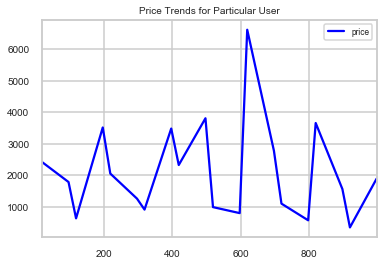

In [64]:
max_user_id = df.user_id.value_counts().index[0]
df[df.user_id == max_user_id][['price']].plot(style='blue')
plt.title('Price Trends for Particular User')
plt.show()

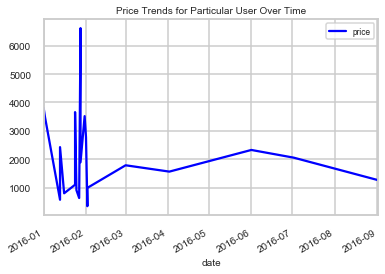

In [65]:
df[df.user_id == max_user_id].plot(x='date',y='price',style='blue')   
plt.title('Price Trends for Particular User Over Time')
plt.show()

## Bar plot

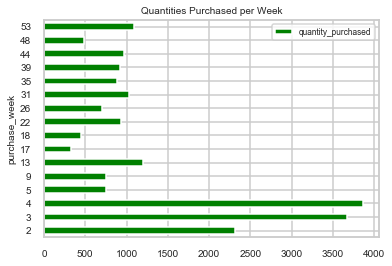

In [66]:
df[['purchase_week',
    'quantity_purchased']].groupby('purchase_week').sum().plot.barh(
                                                            color='green')
plt.title('Quantities Purchased per Week')
plt.show()

## Histograms

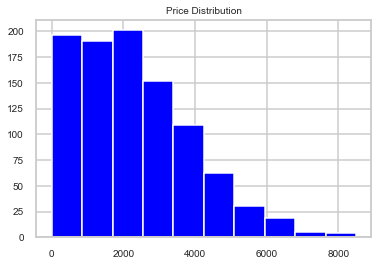

In [67]:
df.price.hist(color='blue')
plt.title('Price Distribution')
plt.show()

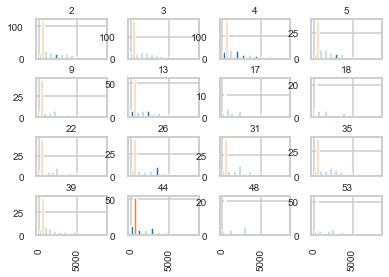

In [69]:
df[['price','purchase_week']].hist(by='purchase_week',sharex=True)
#plt.title('Price Distribution per Week')
plt.show()

## Pie Chart

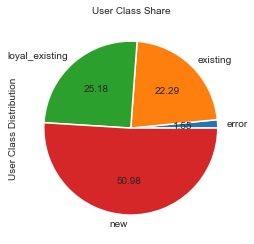

In [70]:
class_series = df.groupby('user_class').size()
class_series.name = 'User Class Distribution'
class_series.plot.pie(autopct='%.2f')
plt.title('User Class Share')
plt.show()

## Box Plot

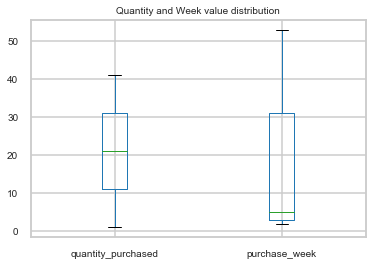

In [71]:
df[['quantity_purchased','purchase_week']].plot.box()
plt.title('Quantity and Week value distribution')
plt.show()

## Bubble Charts

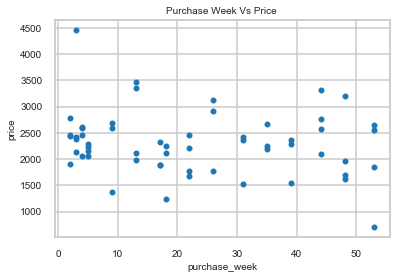

In [72]:

# bubble
uclass_map = {'new': 1, 'existing': 2, 'loyal_existing': 3,'error':0}
df['enc_uclass'] = df.user_class.map(uclass_map) 
bubble_df = df[['enc_uclass',
                'purchase_week',
                'price','product_id']].groupby(['purchase_week',
                                                'enc_uclass']).agg({'price':'mean',
                                                                    'product_id':'count'}).reset_index()
bubble_df.rename(columns={'product_id':'total_transactions'},inplace=True)


bubble_df.plot.scatter(x='purchase_week',
                       y='price')
plt.title('Purchase Week Vs Price ')
plt.show()

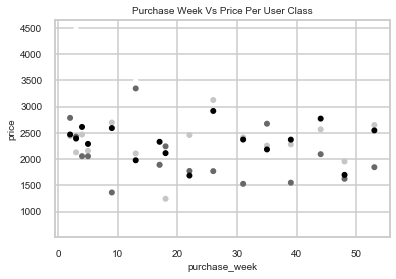

In [73]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass']) 
plt.title('Purchase Week Vs Price Per User Class')                       
plt.show()

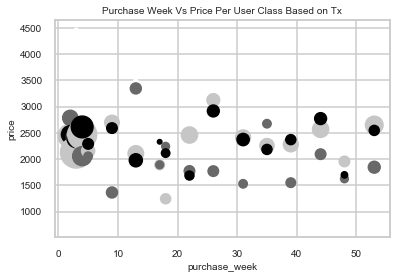

In [74]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass'],
                       s=bubble_df['total_transactions']*10)
plt.title('Purchase Week Vs Price Per User Class Based on Tx')                          
plt.show()

## Figures and Subplots

- This notebook showcases visualizations using matplotlib

In [75]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

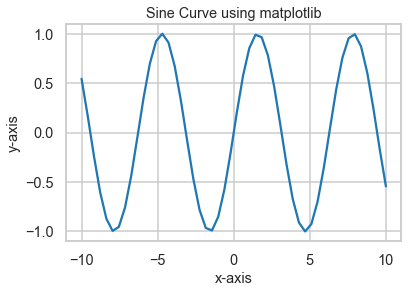

In [76]:
# sample plot
x = np.linspace(-10, 10, 50)
y=np.sin(x)

plt.plot(x,y)
plt.title('Sine Curve using matplotlib')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

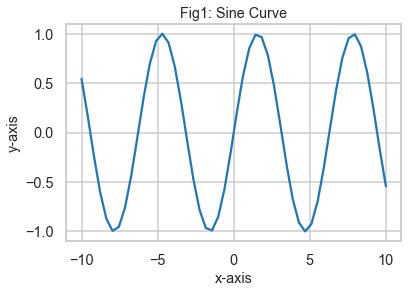

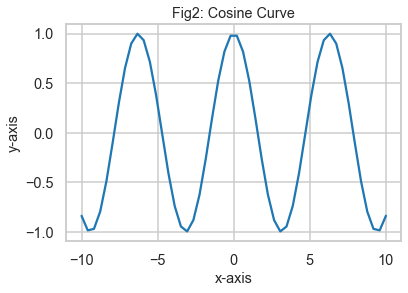

In [77]:
# first figure
plt.figure(1)
plt.plot(x,y)
plt.title('Fig1: Sine Curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

plt.figure(2)
y=np.cos(x)
plt.plot(x,y)
plt.title('Fig2: Cosine Curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

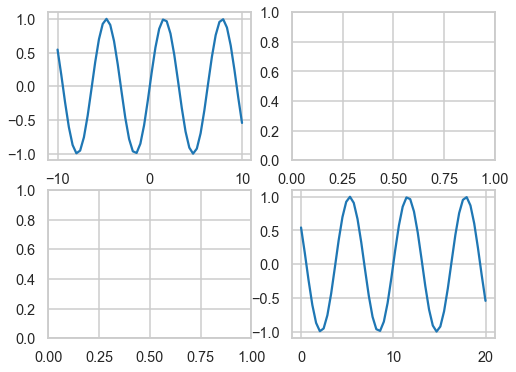

In [78]:
# fig.add_subplot
y = np.sin(x)
figure_obj = plt.figure(figsize=(8, 6))
ax1 = figure_obj.add_subplot(2,2,1)
ax1.plot(x,y)

ax2 = figure_obj.add_subplot(2,2,2)
ax3 = figure_obj.add_subplot(2,2,3)

ax4 = figure_obj.add_subplot(2,2,4)
ax4.plot(x+10,y)
plt.show()

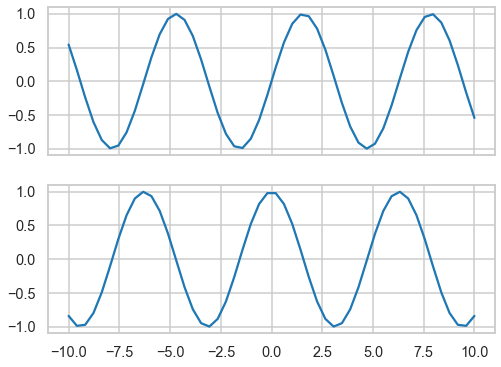

In [79]:

# plt.subplots
fig, ax_list = plt.subplots(2,1,sharex=True, figsize=(8, 6))
y= np.sin(x)
ax_list[0].plot(x,y)

y= np.cos(x)
ax_list[1].plot(x,y)
plt.show()

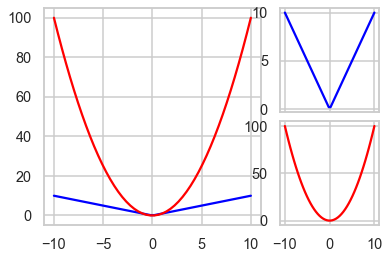

In [80]:
# subplot2grid
y = np.abs(x)
z = x**2

plt.subplot2grid((4,3), (0, 0), rowspan=4, colspan=2)
plt.plot(x, y,'b',x,z,'r')

ax2 = plt.subplot2grid((4,3), (0, 2),rowspan=2)
plt.plot(x, y,'b')
plt.setp(ax2.get_xticklabels(), visible=False)

plt.subplot2grid((4,3), (2, 2), rowspan=2)
plt.plot(x, z,'r')

plt.show()

## Plot Formatting

- Line Color
- Line Style
- Data Marker
- Line Width
- Alpha Level/Transparency
- Shorthand notation

In [81]:
y = x

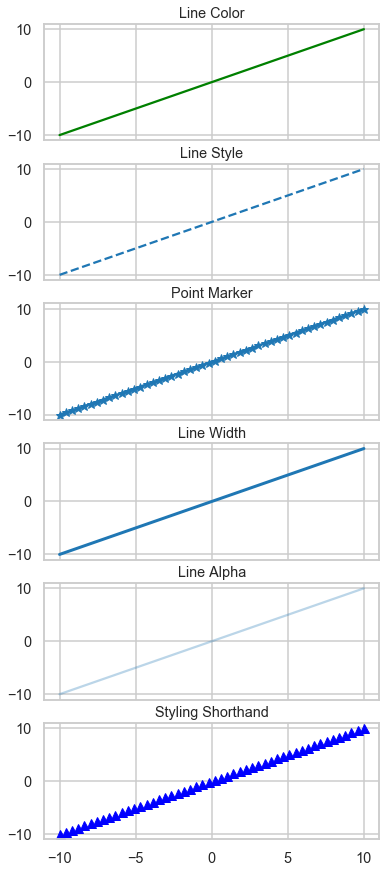

In [82]:
# color
ax1 = plt.subplot(611)
plt.plot(x,y,color='green')
ax1.set_title('Line Color')
plt.setp(ax1.get_xticklabels(), visible=False)

# linestyle
# linestyles -> '-','--','-.', ':', 'steps'
ax2 = plt.subplot(612,sharex=ax1)
plt.plot(x,y,linestyle='--')
ax2.set_title('Line Style')
plt.setp(ax2.get_xticklabels(), visible=False)

# marker
# markers -> '+', 'o', '*', 's', ',', '.', etc
ax3 = plt.subplot(613,sharex=ax1)
plt.plot(x,y,marker='*')
ax3.set_title('Point Marker')
plt.setp(ax3.get_xticklabels(), visible=False)

# line width
ax4 = plt.subplot(614,sharex=ax1)
line = plt.plot(x,y)
line[0].set_linewidth(3.0)
ax4.set_title('Line Width')
plt.setp(ax4.get_xticklabels(), visible=False)

# alpha
ax5 = plt.subplot(615,sharex=ax1)
alpha = plt.plot(x,y)
alpha[0].set_alpha(0.3)
ax5.set_title('Line Alpha')
plt.setp(ax5.get_xticklabels(), visible=False)

# combine linestyle
ax6 = plt.subplot(616,sharex=ax1)
plt.plot(x,y,'b^')
ax6.set_title('Styling Shorthand')

fig = plt.gcf()
fig.set_figheight(15)
plt.show()

## Legends

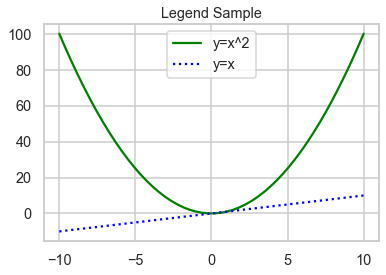

In [83]:
# legends
y = x**2
z = x

plt.plot(x,y,'g',label='y=x^2')
plt.plot(x,z,'b:',label='y=x')
plt.legend(loc="best")
plt.title('Legend Sample')
plt.show()

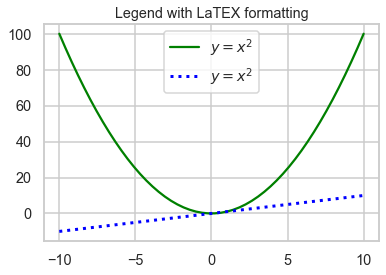

In [84]:
# legend with latex formatting
plt.plot(x,y,'g',label='$y = x^2$')
plt.plot(x,z,'b:',linewidth=3,label='$y = x^2$')
plt.legend(loc="best",fontsize='x-large')
plt.title('Legend with LaTEX formatting')
plt.show()

# Axis Controls


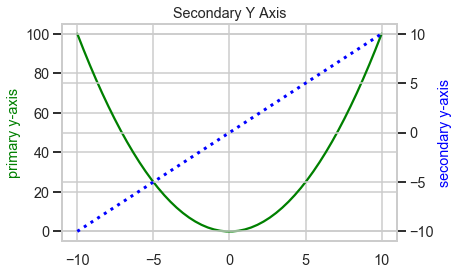

In [85]:

## axis controls
# secondary y-axis
fig, ax1 = plt.subplots()
ax1.plot(x,y,'g')
ax1.set_ylabel(r"primary y-axis", color="green")

ax2 = ax1.twinx()

ax2.plot(x,z,'b:',linewidth=3)
ax2.set_ylabel(r"secondary y-axis", color="blue")

plt.title('Secondary Y Axis')
plt.show()

C:\Users\Shashi Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\Shashi Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shashi Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


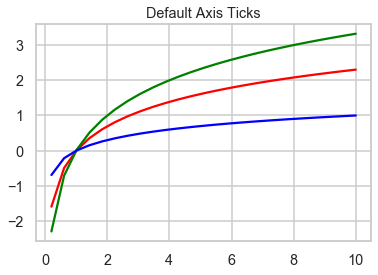

In [86]:
# ticks
y = np.log(x)
z = np.log2(x)
w = np.log10(x)

plt.plot(x,y,'r',x,z,'g',x,w,'b')
plt.title('Default Axis Ticks') 
plt.show()

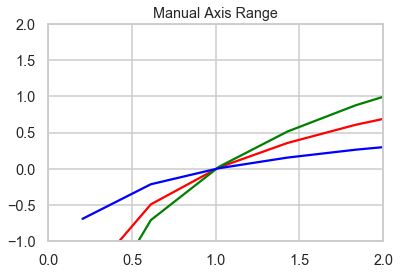

In [87]:
# manual
plt.plot(x,y,'r',x,z,'g',x,w,'b')
plt.axis([0,2,-1,2])
plt.title('Manual Axis Range') 
plt.show()

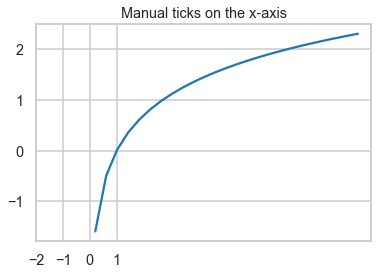

In [88]:
# Manual ticks      
plt.plot(x, y)
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")
plt.show()

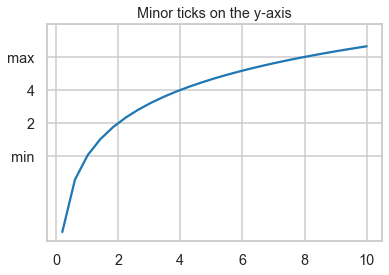

In [89]:

# minor ticks
plt.plot(x, z)
plt.minorticks_on()
ax = plt.gca()
ax.yaxis.set_ticks(np.arange(0, 5))
ax.yaxis.set_ticklabels(["min", 2, 4, "max"])
plt.title("Minor ticks on the y-axis")   
plt.show()

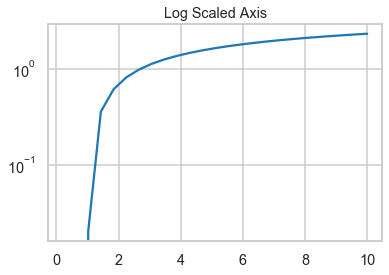

In [90]:

# scaling
plt.plot(x, y)
ax = plt.gca()
# values: log, logit, symlog
ax.set_yscale("log")
plt.grid(True)
plt.title("Log Scaled Axis")
plt.show()

# Annotations

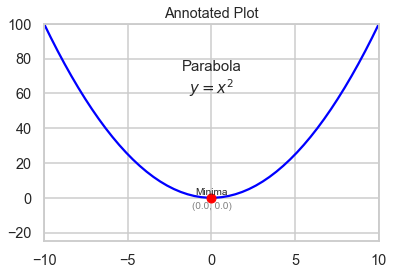

In [91]:

# annotations
y = x**2
min_x = 0
min_y = min_x**2

plt.plot(x, y, "b-", min_x, min_y, "ro")
plt.axis([-10,10,-25,100])

plt.text(0, 60, "Parabola\n$y = x^2$", fontsize=15, ha="center")
plt.text(min_x, min_y+2, "Minima", ha="center")
plt.text(min_x, min_y-6, "(%0.1f, %0.1f)"%(min_x, min_y), ha='center',color='gray')
plt.title("Annotated Plot")
plt.show()

In [92]:
# global formatting params
params = {'legend.fontsize': 'large',
'figure.figsize': (10, 10),
'axes.labelsize': 'large',
'axes.titlesize':'large',
'xtick.labelsize':'large',
'ytick.labelsize':'large'}
plt.rcParams.update(params)